In [1]:
import os
import pandas as pd
import numpy as np
import glob
import json

import matplotlib.pyplot as plt
import seaborn as sns

from managedata.handle_dataset import DataSet

In [2]:
# data folder
folder_data = '/home/anaflo/MDMC/thesis/sensorium/data/'

# metadata folder
folder_meta = os.path.join('..','metadata')

In [3]:
# Inizialize and object from DataSet to handle the dataset
dat = DataSet(folder_data, folder_meta)

In [4]:
# load trials metadata
dat.load_trials_meta()
# load segment metadata
dat.load_segments_meta()


Loading trials metadata...
Loading segments metadata...


In [5]:
dat.segments_df

,segment_ID,segment_label,video_ID,video_label,recording,trial,segment_index,frame_start,frame_end
0,s706895,PinkNoise,v789249,PinkNoise,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,80,4,108,135
1,s706895,PinkNoise,v789249,PinkNoise,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,589,4,108,135
2,s706895,PinkNoise,v789249,PinkNoise,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,482,4,108,135
3,s706895,PinkNoise,v789249,PinkNoise,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,117,4,108,135
4,s706895,PinkNoise,v789249,PinkNoise,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,236,4,108,135
...,...,...,...,...,...,...,...,...,...
22,s053202,Gabor,v516325,Gabor,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,388,0,0,25
23,s053202,Gabor,v516325,Gabor,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,55,0,0,25
24,s053202,Gabor,v516325,Gabor,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,126,0,0,25
25,s053202,Gabor,v516325,Gabor,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,523,0,0,25


204 different segments for label PinkNoise
1 different segments for label Background
180 different segments for label NaturalImages
210 different segments for label GaussianDot
72 different segments for label Gabor
96 different segments for label RandomDots


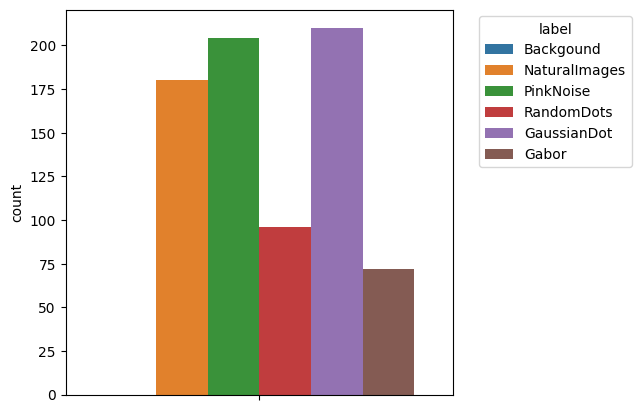

In [6]:
# count the total number of different segment per label
labels_order=["Backgound", "NaturalImages", "PinkNoise","RandomDots","GaussianDot","Gabor"]

labels = set(dat.segments_df['segment_label'].to_list())
fig, ax =plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
count_segments = pd.DataFrame(columns=['label', 'count'])
for i, lab in enumerate(labels):
    df_segments_lab = dat.filter_segments(segment_label=lab)
    count = df_segments_lab["segment_ID"].nunique()
    count_segments.loc[len(count_segments)] = [lab, count]
    print(f"{count} different segments for label {lab}")
ax = sns.barplot(data=count_segments, y="count", hue="label", hue_order=labels_order)
ax.legend(
    title="label",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)


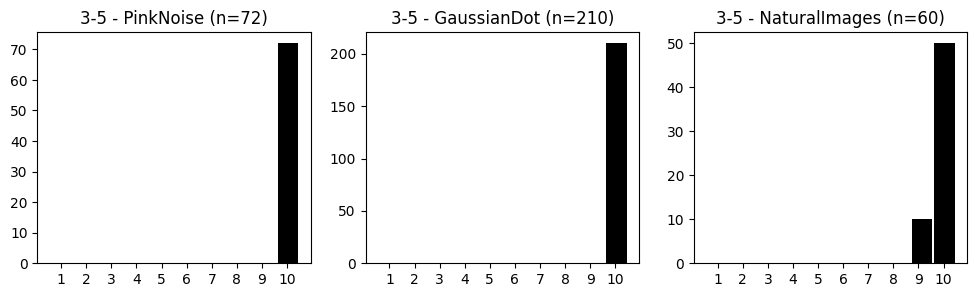

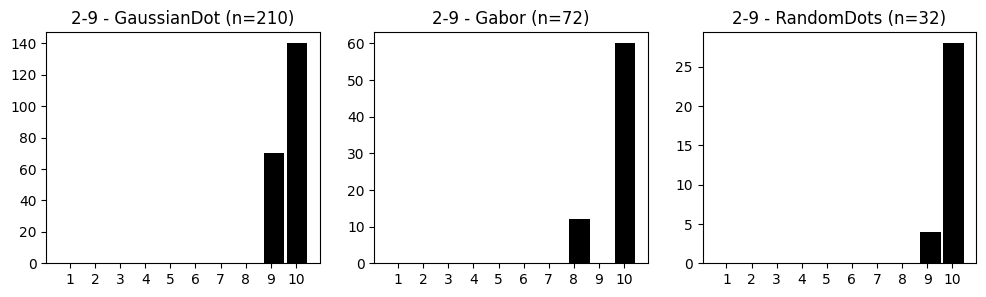

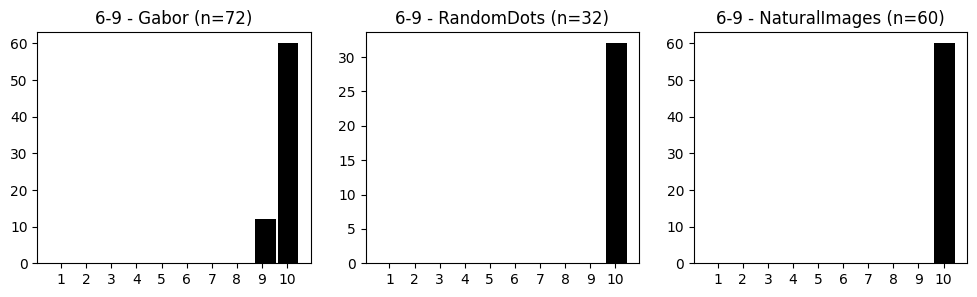

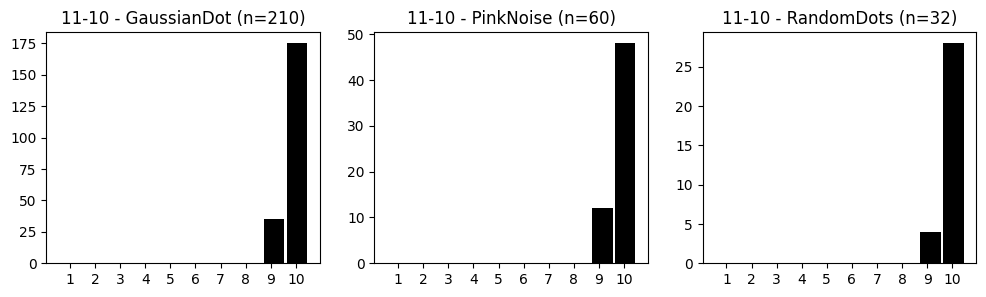

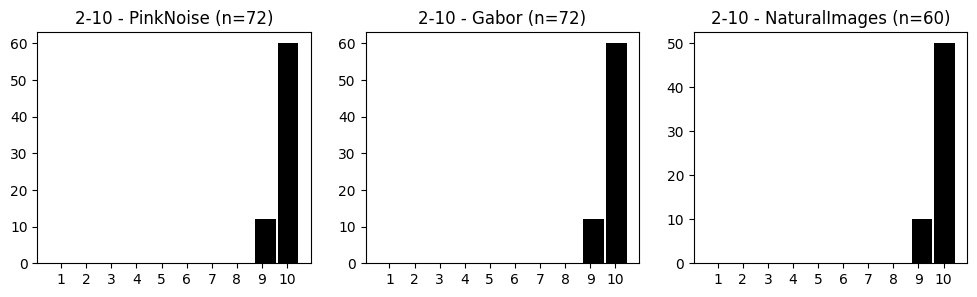

In [7]:
# count the number of occurences of each segment per recording
counts = dat.count_segments_across(["segment_ID","recording","segment_label"])
for rec in dat.recording:
    all_segments_df_rec = dat.filter_segments(recording=rec)
    labels = set(all_segments_df_rec['segment_label'].to_list())
    labels.discard("Background")
    fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
    for i, label in enumerate(labels):
        d = counts[(counts['recording']==rec) & (counts['segment_label']==label)]['count'].to_numpy()
        xmax = np.max(d)
        h = ax[i].hist(d, range=(.5, xmax+0.5), bins=xmax+1, color='k',rwidth=0.9)
        ax[i].set_xticks(np.arange(1,xmax+1))
        ax[i].set_title(f"{rec[13:rec.find('Video')-1]} - {label} (n={len(d)})")

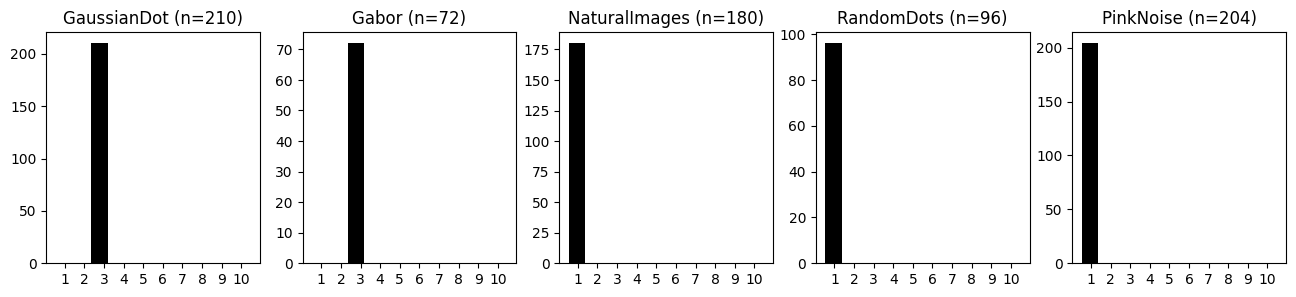

In [8]:
labels = ['GaussianDot','Gabor','NaturalImages','RandomDots','PinkNoise']
fig, ax =plt.subplots(nrows=1, ncols=len(labels), figsize=(16, 3))
xmax = 10
for i, lab in enumerate(labels):
    df_segments_lab = dat.filter_segments(segment_label=lab)
    count_recordings = df_segments_lab.groupby("segment_ID")["recording"].nunique()
    count_recordings = count_recordings.reset_index()
    count_recordings.columns = ["segment_ID"]+["n_recordings"]
    d = count_recordings["n_recordings"].to_numpy()
    h = ax[i].hist(d, range=(.5, xmax+0.5), bins=xmax+1, color='k',rwidth=0.9)
    ax[i].set_xticks(np.arange(1,xmax+1))
    ax[i].set_title(f"{lab} (n={len(d)})")


In [14]:
dat.filter_segments(segment_label='Gabor')

,segment_ID,segment_label,video_ID,video_label,recording,trial,segment_index,frame_start,frame_end
0,s760623,Gabor,v054019,Gabor,dynamic29234-6-9-Video-8744edeac3b4d1ce16b6809...,12,4,100,125
1,s760623,Gabor,v054019,Gabor,dynamic29234-6-9-Video-8744edeac3b4d1ce16b6809...,667,4,100,125
2,s760623,Gabor,v054019,Gabor,dynamic29234-6-9-Video-8744edeac3b4d1ce16b6809...,540,4,100,125
3,s760623,Gabor,v054019,Gabor,dynamic29234-6-9-Video-8744edeac3b4d1ce16b6809...,14,4,100,125
4,s760623,Gabor,v054019,Gabor,dynamic29234-6-9-Video-8744edeac3b4d1ce16b6809...,26,4,100,125
...,...,...,...,...,...,...,...,...,...
22,s053202,Gabor,v516325,Gabor,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,388,0,0,25
23,s053202,Gabor,v516325,Gabor,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,55,0,0,25
24,s053202,Gabor,v516325,Gabor,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,126,0,0,25
25,s053202,Gabor,v516325,Gabor,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,523,0,0,25


(<Figure size 1500x400 with 10 Axes>,
 array([[<Axes: title={'center': 'frame 0'}>,
         <Axes: title={'center': 'frame 1'}>,
         <Axes: title={'center': 'frame 2'}>,
         <Axes: title={'center': 'frame 3'}>,
         <Axes: title={'center': 'frame 4'}>],
        [<Axes: title={'center': 'frame 5'}>,
         <Axes: title={'center': 'frame 6'}>,
         <Axes: title={'center': 'frame 7'}>,
         <Axes: title={'center': 'frame 8'}>,
         <Axes: title={'center': 'frame 9'}>]], dtype=object))

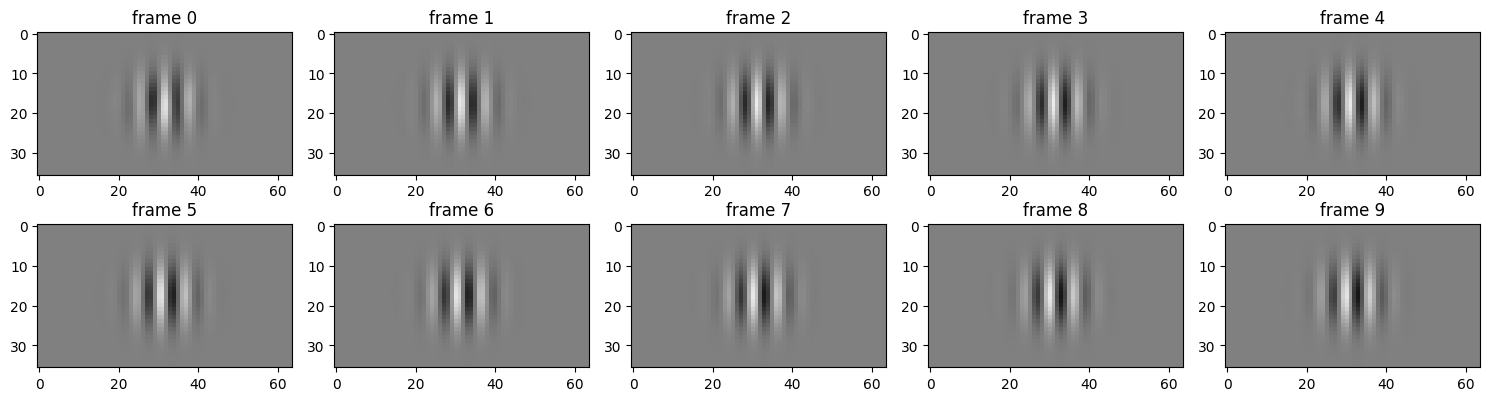

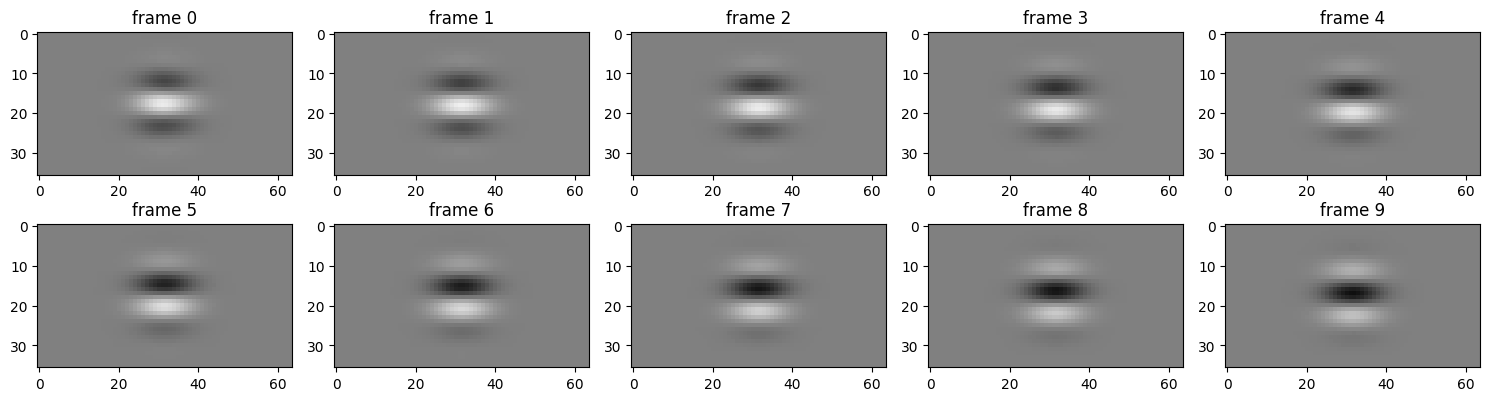

In [15]:
segment_i = dat.load_segment_by_id('s760623')
segment_j = dat.load_segment_by_id('s053202')

frames = np.arange(0,10)
segment_i.plot_frames(frames)
segment_j.plot_frames(frames)


(<Figure size 1500x400 with 10 Axes>,
 array([[<Axes: title={'center': 'frame 0'}>,
         <Axes: title={'center': 'frame 1'}>,
         <Axes: title={'center': 'frame 2'}>,
         <Axes: title={'center': 'frame 3'}>,
         <Axes: title={'center': 'frame 4'}>],
        [<Axes: title={'center': 'frame 5'}>,
         <Axes: title={'center': 'frame 6'}>,
         <Axes: title={'center': 'frame 7'}>,
         <Axes: title={'center': 'frame 8'}>,
         <Axes: title={'center': 'frame 9'}>]], dtype=object))

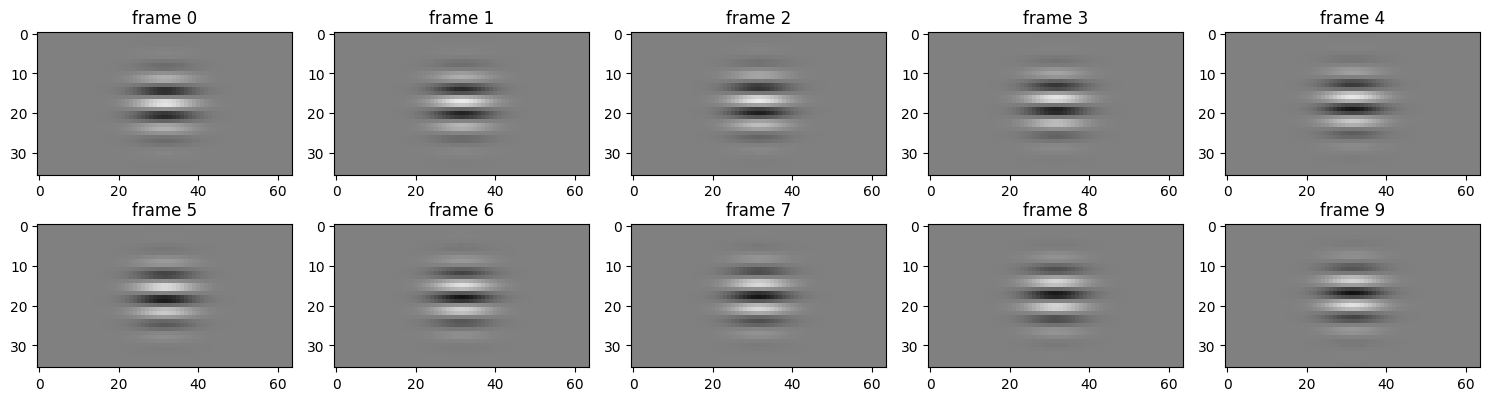

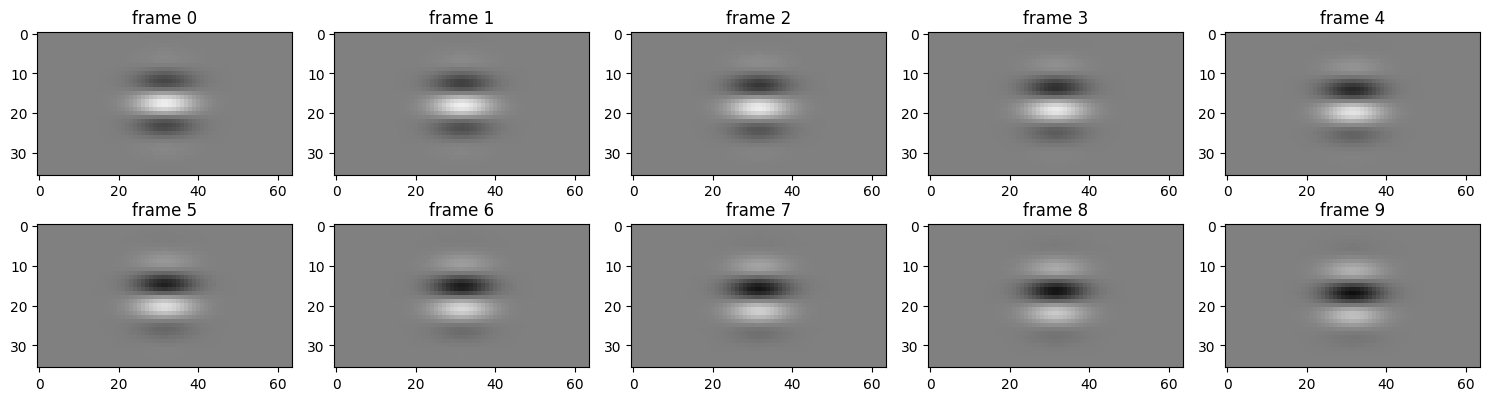

In [16]:
video_i = dat.load_video_by_id('v054019')
video_j = dat.load_video_by_id('v516325')

frames = np.arange(0,10)
video_i.plot_frames(frames)
video_j.plot_frames(frames)